# Discovering Sale Pricing Trends Related to Features and Condition of Used Cars 

## Introduction

Selling and buying used cars is fraught with complexity due to the many factors related to vehicle condition and the money at stake in each transaction. In the present analysis we will discover preferences for car brands and features as they relates to price points and condition of the car.

A sample of 50,000 used car listings was taken from *eBay Kleinanzeigen*, a classifieds section of the German eBay website. The sample was taken from a larger dataset located on [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data) and then reduced and "dirtied" a bit to create a data cleaning challenge as part of the [Dataquest.io](https://www.dataquest.io) curriculum.

The findings of this study show that price can vary markedly according to brand--much more so than odometer mileage of a car. If mileage at time of sale can be taken as an indirect indicator of the condition of the car because the seller is ready to "move on" to another car, then we can take caution that price is not necessarily correlated with vehicle quality and durability. In other words, higher prices do not always mean higher durability. A buyer may be able to find a high quality vehicle at a price point substantially less than the most expensive brands.

## Sample

The German eBay dataset contains abundant information for each car transaction. Each sampled listing (arranged as a row) contains the following information arranged in columns:

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

We will use this data set to analyze information about the German used car market.

In [1]:
# import the pandas and NumPy libraries
import pandas as pd
import numpy as np

# read the 'autos.csv' data file into a pandas
# dataframe and save it as 'autos'
autos = pd.read_csv('autos.csv', encoding='Latin-1')


## Exploring and Cleaning the Data

Let's take a look at the structure of the data, beginning with an overview of all columns for the first and last few rows.

In [2]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


Next, we'll take a look at some information about the data as a whole.

In [3]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As we can see from the information above, there are a total of 50,000 data points in the set. Information about each car is detailed in 20 columns. Most columns contain data, but several columns contain fewer than 50,000 data points (but no more than 20% of the total data points in each column are missing): 'vehicleType', 'gearbox', 'model', 'fuelType', and 'notRepairedDamage'. Later on, we'll explore why these values are missing and make decisions on whether to exclude, include, or clean the affected data points.

Some columns such as 'price' are object types that we may want to convert to integer types later so that we can explore a fuller range of descriptive statistics. Also, some of the column names are in camelcase (e.g., 'monthOfRegistration') which is less compatible with Python, so we'll convert these to a more usable format. Below, is a list of the original column names.

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We'll makes a few changes to the column names as follows:

- Four column names are shortened and made more clear
    - yearOfRegistration to registration_year
    - monthOfRegistration to registration_month
    - notRepairedDamage to unrepaired_damage
    - dateCreated to ad_created
- The remaining changes were additions of underscores and changing case to entirely lowercase to complete the conversion to snakecase.

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-04 16:40:33,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Some columns have mostly one value and we will drop from the analysis to make things simpler.

- 'seller' has 49,999 instances of "privat"
- 'offer_type' has 49,999 instances of "Angebot"
- 'nr_of_pictures' has all one value, "0"

Other columns need further investigation:

- 'postal_code' is encoded at integer types whereas a string type may be more useful at helping identify unique values

Some columns have numeric data stored as text that needs to be cleaned.

- 'price'
- 'odometer'

We'll drop the three columns mentioned just above:

In [7]:
autos = autos.drop(['nr_of_pictures', 'seller', 'offer_type'], axis=1)

Next, we'll clean the `price` and `auto` columns and convert them to integers.

In [8]:
autos['price'] = (autos['price']
                          .str.replace('$','')
                          .str.replace(',','')
                          .astype(int)
                 )

# show the first five values of 'price'
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [9]:
autos['odometer_km'] = (autos['odometer_km']
                             .str.replace('km','')
                             .str.replace(',','')
                             .astype(int)
                        )

# show the first five values of 'odometer_km'
autos['odometer_km'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

## Exploring Odometer Readings and Sale Price

Unrealistically high or low data points (outliers) may be present in the data due to data entry errors, so we'll look at minimum and maximum values to check for this potential problem.

### Odometer Readings

In [10]:
# count the values from the 'odometer_km' column and sort
odometer_count = autos["odometer_km"].value_counts().sort_index()

print("- There are ", autos["odometer_km"].unique().shape, "unique values in the 'odometer_km' column.")
print("- Odometer readings are classified in numbers rounded to one of the 13 options listed below:")
print('MILEAGE','  ','COUNT')
print(odometer_count)

- There are  (13,) unique values in the 'odometer_km' column.
- Odometer readings are classified in numbers rounded to one of the 13 options listed below:
MILEAGE    COUNT
5000        967
10000       264
20000       784
30000       789
40000       819
50000      1027
60000      1164
70000      1230
80000      1436
90000      1757
100000     2169
125000     5170
150000    32424
Name: odometer_km, dtype: int64


Next, we will visualize the odometer readings from above using a graph:

Type: <class 'matplotlib.axes._subplots.AxesSubplot'>


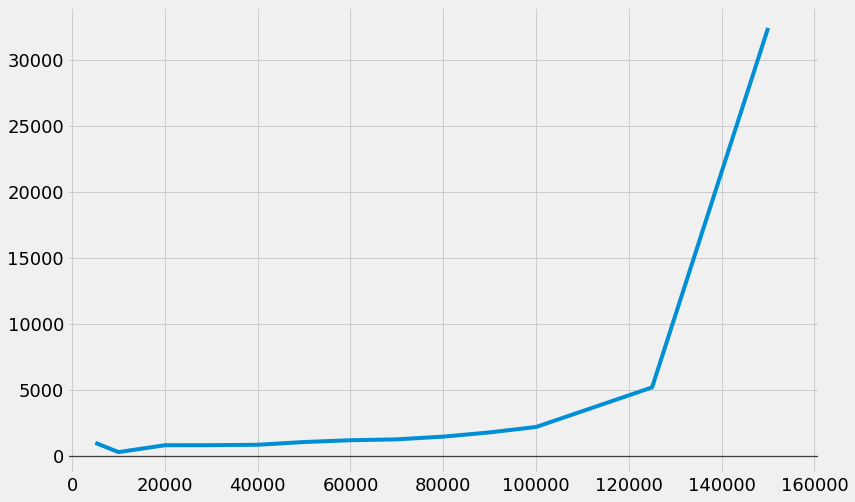

In [11]:
# enable matplotlib to run inline in Jupyter
%matplotlib inline

# import graphing styles and select one template
import matplotlib.style as style
style.use('fivethirtyeight')

odometer_graph = odometer_count.plot(x = odometer_count.iloc,
                                     y = odometer_count.index,
                                     figsize = (12,8)
                                    )
odometer_graph.tick_params(axis = 'both',
                           which = 'major',
                           labelsize = 18
                          )
odometer_graph.axhline(y = 0, color ='black',
                      linewidth = 1.3,
                      alpha = .7)
odometer_graph.set_xlim(left = -1000, right = 161000)

# verify that pandas is using matplotlib objects
print('Type:', type(odometer_graph))                                

There are many more high mileage vehicles than low milage vehicles (<100,000 km) and this is consistent with listings of used cars for sale. There are no apparent outliers of odometer readings that would indicate a data entry error.

### Price

In [12]:
print("- There are ", autos["price"].unique().shape, "unique values in the 'price' column.")
print(autos["price"].describe())

- There are  (2357,) unique values in the 'price' column.
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


- Given that there are 50,000 cars represented, having 2,357 unique values means that sale prices were also rounded somewhat, but not to the extreme as the odometer rounding.
- The minimum price value is zero, so at least one car was given away.
- The standard deviation is unusually large at \\$48,000, whilw the mean is \\$9,840, so there is at least one very high price acting as an outlier (maximum is ~\\$100 million -- too high for even a rare, classic car!)

Let's take a closer look at the various prices for the used car sales:

In [13]:
print("The five most common sale prices are:")
print("PRICE    COUNT")
print(autos["price"].value_counts().head())

The five most common sale prices are:
PRICE    COUNT
0       1421
500      781
1500     734
2500     643
1000     639
Name: price, dtype: int64


In [14]:
print("The twenty-five lowest sale prices are:")
print("PRICE    COUNT")
print(autos["price"]
          .value_counts()
          .sort_index(ascending=True)
          .head(25)
     )
print('')
print("The twenty-five highest sale prices are:")
print("PRICE    COUNT")
print(autos["price"]
          .value_counts()
          .sort_index(ascending=False)
          .head(25)
     )

The twenty-five lowest sale prices are:
PRICE    COUNT
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
40       6
45       4
47       1
49       4
50      49
Name: price, dtype: int64

The twenty-five highest sale prices are:
PRICE    COUNT
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
194000      1
190000      1
180000      1
175000      1
169999      1
Name: price, dtype: int64


1,421 cars were listed with a price of \\$0. This represents a little over two percent of all ads, so we'll remove these while keeping all items listed at one dollar or above, to the point of \\$350,000. After that point the price of cars jumps suddently as a few examples are outliers with prices not necessarily representative of the sample as a whole.

In [15]:
# Exclude valutes in dataset that are not between 1 and 350,000
autos = autos[autos["price"].between(1,350000)]

In [16]:
autos.info()
autos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48565 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        48565 non-null  object
 1   name                48565 non-null  object
 2   price               48565 non-null  int64 
 3   abtest              48565 non-null  object
 4   vehicle_type        43979 non-null  object
 5   registration_year   48565 non-null  int64 
 6   gearbox             46222 non-null  object
 7   power_ps            48565 non-null  int64 
 8   model               46107 non-null  object
 9   odometer_km         48565 non-null  int64 
 10  registration_month  48565 non-null  int64 
 11  fuel_type           44535 non-null  object
 12  brand               48565 non-null  object
 13  unrepaired_damage   39464 non-null  object
 14  ad_created          48565 non-null  object
 15  postal_code         48565 non-null  int64 
 16  last_seen           48

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [17]:
print("The twenty-five lowest sale prices (excluding outliers) are:")
print("PRICE    COUNT")
print(autos["price"]
           .value_counts()
           .sort_index(ascending=True)
           .head(25)
      )
print('')
print("The twenty-five highest sale prices (excluding outliers) are:")
print("PRICE    COUNT")
print(autos["price"]
           .value_counts()
           .sort_index(ascending=False)
           .head(25)
      )

The twenty-five lowest sale prices (excluding outliers) are:
PRICE    COUNT
1     156
2       3
3       1
5       2
8       1
9       1
10      7
11      2
12      3
13      2
14      1
15      2
17      3
18      1
20      4
25      5
29      1
30      7
35      1
40      6
45      4
47      1
49      4
50     49
55      2
Name: price, dtype: int64

The twenty-five highest sale prices (excluding outliers) are:
PRICE    COUNT
350000    1
345000    1
299000    1
295000    1
265000    1
259000    1
250000    1
220000    1
198000    1
197000    1
194000    1
190000    1
180000    1
175000    1
169999    1
169000    1
163991    1
163500    1
155000    1
151990    1
145000    1
139997    1
137999    1
135000    1
130000    1
Name: price, dtype: int64


A total of 48,565 data entries remain after excluding the outliers. The frequency counts of specific price values show that the desired minimum values of \\$1 and maximum of \\$350,000 remain.

Now, as we run the descriptive statistics again on the somewhat reduced data set, we have a bit more representative understanding of the overall data.

In [18]:
print("- There are ", autos["price"].unique().shape, "unique values in the 'price' column.")
print(autos["price"].describe())

- There are  (2346,) unique values in the 'price' column.
count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64


Now, we can see a much more readable list of descriptive statistics for the data. Standard deviation of ~\\$9,000 is much easier to visualize, along with the percentiles at 25%, 50%, and 75%.

# Exploring Dates

There are five columns of data related to dates:

- date_crawled - date the ad was added to the data set by the crawler
- last_seen - date of the last update on a car was added by the crawler
- ad_created - date that the ad was posted on the eBay  website
- registration_month - month date of the vehicle's registration as listed on the eBay website ad
- registration_year - year date of the vehicle's registration as listed on the eBay website ad

The columns are one of two different data types, either a string or numeric data as seen below:

In [19]:
autos[['date_crawled','ad_created','last_seen','registration_month','registration_year']][0:5]

,date_crawled,ad_created,last_seen,registration_month,registration_year
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54,3,2004
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08,6,1997
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37,7,2009
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28,6,2007
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50,7,2003


First, we'll explore the distribution of values in the 'date_crawled' column.


In [20]:
(autos['date_crawled']
                 .str[:10]  #select just the first 10 characters of the string
                 .value_counts(normalize=True, dropna=False)
                 .sort_index(ascending=True)
)

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

Data was scraped from the eBay website between 2016-03-05 and 2016-04-07. Consistent amounts of data were scraped each day (approximately 1-3% of the entries), although there was a drop off of amounts scraped in the last two days (approximately 0.1-0.3%).

Now, we'll compared the scraping dates with the date of ad creation on eBay:

In [21]:
(autos['ad_created']
                 .str[:10]  #select just the first 10 characters of the string
                 .value_counts(normalize=True, dropna=False)
                 .sort_index(ascending=True)
)

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

The eBay advertisements were created between 2015-06-11 and 2016-04-07, though the 2015 and early 2016 dates represent a very small percentage of the data.

In [22]:
(autos['last_seen']
                 .str[:10]  #select just the first 10 characters of the string
                 .value_counts(normalize=True, dropna=False)
                 .sort_index(ascending=True)
)

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The dates that the ads were last seen online by the web crawler are consistent with the timeline during which data was scraped from the eBay website (between 2016-03-05 and 2016-04-07.) Though, during the last three days (2016-04-05 through 2016-04-07) 47% of the ads were last seen at that point. It's not likely that there was a sudden increase in sales, but rather that the web crawling period was coming to a conclusion.

Finally, we'll compare the above dates with the distribution of 'registration_year'.

In [23]:
(autos['registration_year']
                    .describe()
)

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Though the mean registration year seems consistent with the price range of the used cars, the minium value of 1000 and 9999 are inaccurate because cars were not invented until the early 1900s and 9999 lies well into the future--far beyond the date that this data was collected (2016).

We'll need to calculate the number of entries that list cars registered outside of the 1900-2016 range of dates to see if we can safely exclude some of the cars.

In [25]:
(~autos["registration_year"].between(1900,2016)).sum() / autos.shape[0]

0.038793369710697

The number of entries with registration dates outside of 1900-2016 is less than 4%, so we can safely exclude those entries.

In [ ]:
autos = autos[autos['registration_year'].between(1900,2016)]

(autos['registration_year']
                .value_counts(normalize=True, dropna=False)
                .sort_index(ascending=True)
)

Now, we have cleaned the data to the point where we have representation from cars throughout the true era of auto manufacturing. Most cars listed in this sample of eBay were registered from 1994-2016.

# Exploring by Brand



In [ ]:
autos['brand'].value_counts(normalize=True)


As expected from a German eBay used car listing page, four out of the top five brands are from German auto manufacturers. Fifty percent of the overall listings are German manufactured. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings:

- Volkswagen
- BMW
- Opel
- Mercedez-Benz
- Audi
- Ford

In [ ]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

In [ ]:
brand_mean_prices = {}

for b in common_brands:
    single_brand = autos[autos['brand'] == b]
    mean_price = single_brand['price'].mean()
    brand_mean_prices[b] = int(mean_price)
    
brand_mean_prices

Results: mean prices among the top brands vary widely. Audi, Mercedez-Benz, and BMW cluster at the high end of the range, while Ford and Opel cluster at the low end of the range. Volkswagen's prices sit right at the middle of the range. Perhaps that explains the appeal of VW--they use many Audi parts, so the quality is higher than the low end, but the overall pricing of the whole car is much less than the luxury counterparts.

# Exploring Mileage

We'll take the dictionary of mean prices from just above and use it to construct a series of the same data--this will make it easier to make further comparisons on the data.

In [ ]:
bmp_series = pd.Series(brand_mean_prices)
print(bmp_series)

In [ ]:
brand_mean_mileage = {}

for b in common_brands:
    brand_only = autos[autos['brand'] == b]
    mean_mileage = brand_only['odometer_km'].mean()
    brand_mean_mileage[b] = int(mean_mileage)
    
mean_price = pd.Series(brand_mean_prices).sort_values(ascending=False)
print(mean_price)
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
print(mean_mileage)




In [ ]:
brand_summary = pd.DataFrame(mean_mileage, columns=['mean_mileage'])
brand_summary

In [ ]:
brand_summary['mean_price'] = mean_price
brand_summary

The comparison of the top brands by mean mileage and mean price show us some new insights. Assuming that higher mileage logged on the odometer at the time of listing means that the seller has had more longevity out of the car before deciding to move on to another model, we can see that the European brands cluster together in the ~130,000 km range, whereas the American brand, Ford, sits below at ~124,000 km. Overall, mileage does not vary nearly as much as price does among the brands.

If someone is aiming for potentially the most reliable vehicle overall, then perhaps the BMW is a good choice, especially since its price is a step more affordable than the top two brands.

# Conclusion

Although selling or buying a used cars can be an overwhelming task as one compares all of the factors that would influence the risk taken in the transaction, data analysis can pull out patterns that can be of benefit when making a used car choice.

In this analysis, we focused on the top five most common brands listed on the German eBay used car market and drew specific conclusions:

- Car brands tend to cluster around price point, "bands"
- Used car mileage does not vary substantially across brands--this is perhaps an indicator that longevity does not vary as much as price would indicate.

In addition, the method of this analysis could also be applied to other datasets such as car markets in other countries if one were to obtain sufficient data.

